# Chapter 5. Odds and Ends

## Odds

The **odds in favor** of an event are the ratio of the probability it will occur to the probability that it will not. For example, if a team has a 75% chance of winning, their odds of winning are $0.75/0.25 = (\frac{3}{4})/(\frac{1}{4}) = \frac{3}{1} = 3:1$, i.e. "three to one odds". We often use the expression "**odds against**" an event is when the probability of the event is low, and the equation is flipped. If the team had a 10% chance of winning, then the odds against them would be $0.9/0.1 = 9:1$, i.e. "nine to one odds against."

## The odds form of Bayes' theorem

The **probability form of Bayes' theorem** is

$$
p(H|D) = \frac{p(H)p(D|H)}{p(D)}
$$

If there are two hypotheses, $A$ and $B$, the ratio of posterior probabilties is

$$
p(A|D) = \frac{p(A)p(D|A)}{p(D)} \qquad p(B|D) = \frac{p(B)p(D|B)}{p(D)} \\
\begin{align}
\frac{p(A|D)}{p(B|D)} &= \frac{\left(\frac{p(A)p(D|A)}{p(D)}\right)}{\left(\frac{p(B)p(D|B)}{p(D)}\right)} \\
&= \frac{p(A)p(D|A)}{p(A)p(D|A)}
\end{align}
$$

Note that the normalizing constant for the probability of the data $p(D)$ cancels out.

If $A$ and $B$ are mutually exclusive and collectively exhaustive, then

$$
p(B) = 1 - p(A)
$$

therefore,

$$
\frac{p(A)}{p(B)} = \frac{p(A)}{1- p(A)} = o(A)
$$

where $o(H)$ are the odds of the hypothesis $H$. Finally, the **odds form of Bayes' theorem** is

$$
o(A|D) = o(A) \frac{p(D|A)}{p(D|B)}
$$

which is just the prior odds multiplied against the liklihood ratio.

## Oliver's blood

> Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data \[the traces found at the scene\] give evidence in favor of the proposition that Oliver was one of the people \[who left blood at the scene\]?

Downey proposes that for data to give evidence in "favor of" a hypothesis, it could mean that the hypothesis is now more likely in light of the new data. Thinking in terms of the odds form of Bayes' theorem, dividing by $o(A)$

$$
\begin{align}
o(A|D) &= o(A) \frac{p(D|A)}{p(D|B)} \\
\frac{o(A|D)}{o(A)} &= \frac{p(D|A)}{p(D|B)}
\end{align}
$$

$\frac{o(A|D)}{o(A)}$: the ratio of posterior and prior odds  
$\frac{p(D|A)}{p(D|B)}$: the liklihood ratio, called the **Bayes factor**

If the Bayes factor is *greater than* 1, then the data were more likely under $A$ than $B$.  
If the Bayes factor is *less than* 1, then the data were more likely under $B$ than $A$.  
If the Bayes factor is *equal to* 1, then the data are equally likely under either hypothesis, so the odds did not change.

Returning to Olver's blood:

* If Oliver is one of the people who left blood at the crime scene, then he accounts for the 'O' sample, so the probability of the data is just the probability that a random member of the population has type 'AB', or 1%.
* If Oliver did not leave the blood at the scene, then we have two samples to account for. In other words, if we choose two random people from the population, what is the chance of finding one with type 'O' and one with type 'AB'? The two combinations could be a type 'O' and type 'AB' pair, or a type 'AB' and type 'O' person. Thus, the probability is $(0.6)(0.01) + (0.01)(0.6) = 1.2\%$.

The liklihood of the data is slightly higher if Oliver is *not* one of the people who left blood at the scene, thus the data is actually evidence *against* Oliver's guilt.

An inference from this result is that the 'AB' blood type holds more weight than does the 'O' blood type because it is the rarer of the two in the population. The liklihood of any of the 'O' type people being the suspect is lower than for all of the 'AB' blood type people.

## Addends

We will now work through a *Dungeons and Dragons* example. We will introduce the use of additions and maximums in Bayesian statistics as we go.

In *D&D*, the results of players' decisions are determined by rolling dice. Before the game, players generate the attributes of their characters by rolling three 6-sided dice and adding them up. Thus, we may want to find the disribution of this sum. There are two ways to compute it:

* **Simulation**: draw random samples from a PMF of a single die, add them up, and accumulate the distribution of simulated sums
* **Enumeration**: enumerate all possible pairs of the values from two PMFs and compute the distribution of the sums

Here is an example of the **simulation** method. Class `Die` represents a single die as a PMF.

In [1]:
from my_suite import Pmf

class Die(Pmf):
    '''
    A single die
    '''
    
    def __init__(self, sides):
        Pmf.__init__(self)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

Introduce a 6-sided die:

In [2]:
d6 = Die(6)

I now define the function `SampleSum()` to generate `n` number of rolls of the `Die`. (The `Random()` method was added to `Pmf` and just returns a random value from the `hypotheses` dicitonary.)

In [3]:
def MakeHistFromList(vals):
    d = {}
    for val in vals:
        if val in d.keys():
            d[val] += 1
        else:
            d[val] = 1
    return d

def MakePmfFromList(vals):
    hist = MakeHistFromList(vals)
    pmf = Pmf()
    for k, v in hist.items():
        pmf.Set(k, v)
    pmf.Normalize()
    return pmf
    
def SampleSum(dists, n):
    pmf = MakePmfFromList(RandomSum(dists) for i in range(n))
    return pmf

def RandomSum(dists):
    total = sum(dist.Random() for dist in dists)
    return total

In [4]:
dice = [d6] * 3
three = SampleSum(dice, 1000)

In [5]:
three.hypotheses

{15: 0.051,
 16: 0.034,
 12: 0.134,
 10: 0.112,
 7: 0.061,
 11: 0.122,
 17: 0.015,
 13: 0.102,
 8: 0.084,
 14: 0.078,
 6: 0.05,
 9: 0.109,
 4: 0.016,
 5: 0.026,
 3: 0.003,
 18: 0.003}

In [6]:
import matplotlib.pyplot as plt
xs = list(three.hypotheses.keys())
xs.sort()
ys = []
for x in xs:
    ys.append(three.hypotheses[x])

plt.plot(xs, ys)
plt.ylabel("probability")
plt.xlabel("dice roll")
plt.title("Estimate of distribution of dice rolls")
plt.show()

<Figure size 640x480 with 1 Axes>

Because this is a simulation over a set number of draws of the distribution, this will only ever be an approximation. Increasing the $n$ number of samples will increase the distribution, but also takes longer to run. Here I increased $n$ to 100,000.

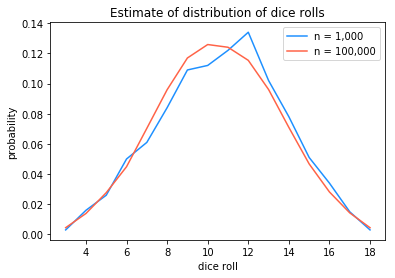

In [7]:
three_2 = SampleSum(dice, 100000)
xs_2 = list(three_2.hypotheses.keys())
xs_2.sort()
ys_2 = []
for x_2 in xs_2:
    ys_2.append(three_2.hypotheses[x_2])

plt.plot(xs, ys, color = 'dodgerblue', label = 'n = 1,000')
plt.plot(xs_2, ys_2, color = 'tomato', label = 'n = 100,000')
plt.ylabel('probability')
plt.xlabel('dice roll')
plt.title('Estimate of distribution of dice rolls')
plt.legend()
plt.show()

You can see how the distribution smooths out substantially with more samples taken. Until $n=\infty$, the distribution will never be exact.

The other approach is to enumerate all pairs oof values and compute the sum and probability of each pair. This is implemented as `Pmf.__add__()` as assumes that each dice roll (PMF) is independent.

In [8]:
three_exact = d6 + d6 + d6

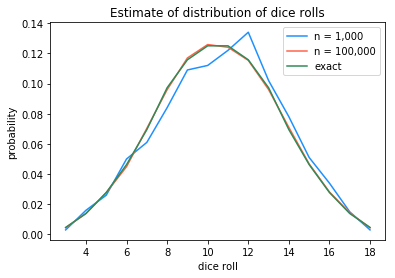

In [9]:
plt.plot(xs, ys, color = 'dodgerblue', label = 'n = 1,000')
plt.plot(xs_2, ys_2, color = 'tomato', label = 'n = 100,000')
plt.plot(list(three_exact.hypotheses.keys()),
         list(three_exact.hypotheses.values()),
         color = 'seagreen', label = 'exact')
plt.ylabel('probability')
plt.xlabel('dice roll')
plt.title('Estimate of distribution of dice rolls')
plt.legend()
plt.show()

In [10]:
diffs = []
for x in xs_2:
    diffs.append(three_exact.hypotheses[x] - three_2.hypotheses[x])

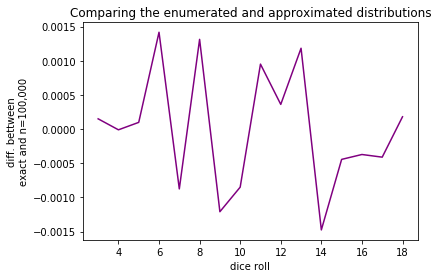

In [12]:
plt.plot(xs_2, diffs, color = 'purple')
plt.ylabel('diff. bettween\nexact and n=100,000')
plt.xlabel('dice roll')
plt.title('Comparing the enumerated and approximated distributions')
plt.show()

Though the differences are small, they do exist. And If I was to run the sample procedure again, the differences were exist and be *different* - they are non-deterministic. Thus, when possible, the enumeration procedure is preferred.